# Telecom Company Data

#### Customer churn is one of the most significant challenges faced by telecom companies in today’s competitive market. Understanding why customers leave and identifying patterns in their behavior are critical for improving retention and maximizing profitability. This project explores a telecom company's customer churn dataset, leveraging data analysis and machine learning techniques to uncover insights into the key factors influencing churn. By analyzing customer demographics, service usage, and financial data, the project aims to identify high-risk customers and recommend actionable strategies to reduce churn. This data-driven approach empowers the telecom company to make informed decisions, enhance customer satisfaction, and sustain long-term growth in a rapidly evolving industry.


In [33]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Dataset

In [3]:
file_path = '/Users/bakhita/Downloads/Telecom Company Data/Telecom Customers Churn.csv'
telecom_data = pd.read_csv(file_path)

In [7]:
# Display basic information about the dataset
telecom_data.info(), telecom_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

In [71]:
# Check for missing values in the dataset
missing_values = telecom_data_cleaned.isnull().sum()

# Filter to show only variables with missing values
missing_variables = missing_values[missing_values > 0]
if not missing_variables.empty:
    print("Variables with missing values:")
    print(missing_variables)
else:
    print("No missing variables found.")

No missing variables found.


In [12]:
telecom_data_cleaned.apply(lambda x: x.str.isspace().sum() if x.dtype == "object" else 0)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
telecom_data_cleaned[['TotalCharges']].query('TotalCharges == 0')


,TotalCharges


The dataset contains no missing values except for the TotalCharges column, which has 11 missing values.

In [16]:
# Drop rows with missing values in 'TotalCharges'
telecom_data_cleaned = telecom_data.dropna(subset=['TotalCharges'])
# Verify if there are any missing values left
missing_values_after_dropping = telecom_data_cleaned.isnull().sum()



In [17]:
# Check the updated shape of the dataset
updated_shape = telecom_data_cleaned.shape

missing_values_after_dropping, updated_shape

(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 (7043, 21))

There are no missing values left in any column. The dataset now contains 7,043 rows and 21 columns.

In [26]:
# Check the first few rows
print(telecom_data_cleaned.head())

# Check column data types
print(telecom_data_cleaned.dtypes)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# EDA

## 1. Dataset Summary

In [19]:

# Unique counts for categorical columns
for column in telecom_data_cleaned.select_dtypes(include=['object']).columns:
    print(f"{column} unique values:\n{telecom_data_cleaned[column].value_counts()}\n")


customerID unique values:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender unique values:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner unique values:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents unique values:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService unique values:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines unique values:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService unique values:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity unique values:
OnlineSecurity
No                     3498
Yes                    2019
No internet servic

The dataset does not contain duplicate customer IDs, which confirms the integrity of the dataset. The overall gender distribution is relatively balanced with 50.5% of customers are male and 49.5% are female. The distribution of partner status is also balanced with 51.7% of customers do not have a partner while 48.3% do. Below are the visualisations:

## 2. Customer Demographics

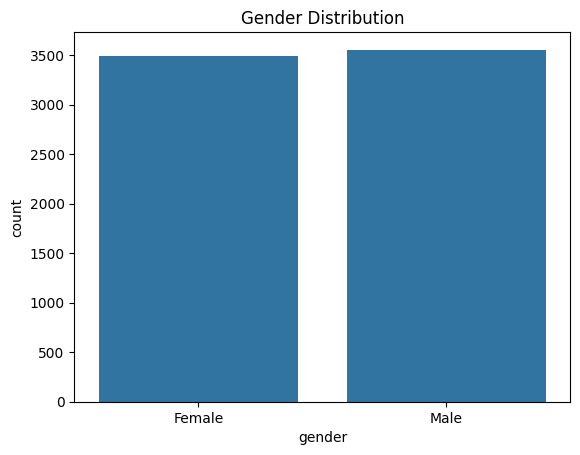

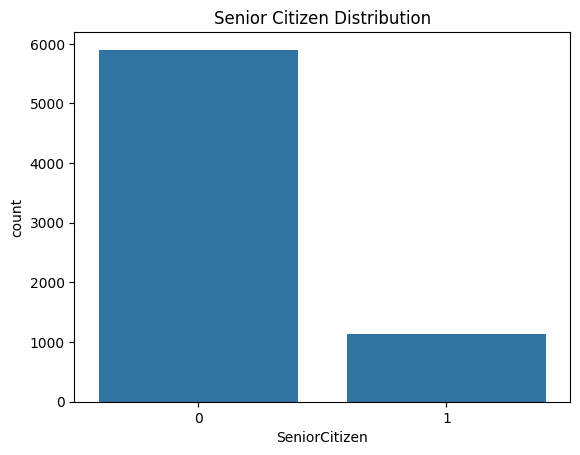

In [20]:
# Gender distribution
sns.countplot(data=telecom_data_cleaned, x='gender')
plt.title('Gender Distribution')
plt.show()

# Senior citizen distribution
sns.countplot(data=telecom_data_cleaned, x='SeniorCitizen')
plt.title('Senior Citizen Distribution')
plt.show()


Only 16.2% of the customers are senior citizens, indicating the majority (83.8%) are not senior citizens. This could be one of the important factors in analyzing churn behavior.

## 3. Churn Rate Analysis

Churn Rate:
 Churn
No    73.463
Yes   26.537
Name: proportion, dtype: float64


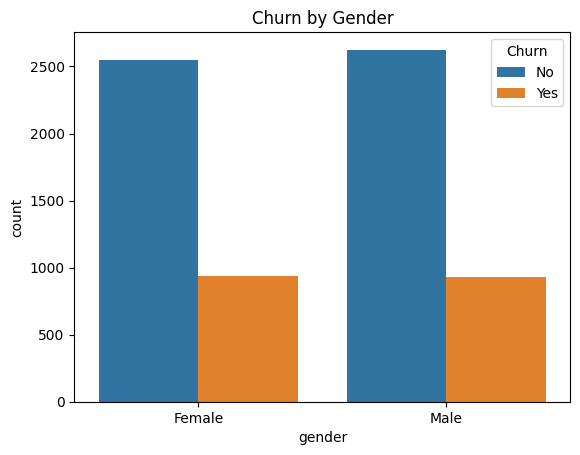

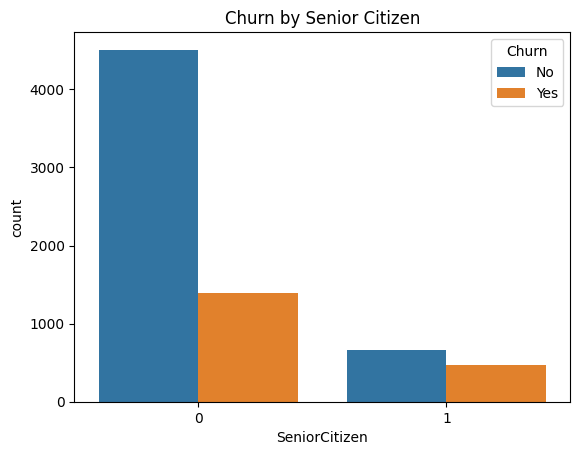

In [21]:
# Overall churn rate
churn_rate = telecom_data_cleaned['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

# Churn by gender
sns.countplot(data=telecom_data_cleaned, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

# Churn by senior citizen
sns.countplot(data=telecom_data_cleaned, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen')
plt.show()


The churn analysis reveals that 73.46% of customers did not churn, while 26.54% of customers left the telecom service. Visualizing churn by gender shows no significant disparity between males and females regarding their likelihood to churn, indicating gender is not a primary factor in churn behavior. 

However, when examining churn among senior citizens, the results are stark: a higher proportion of senior citizens tend to churn compared to younger customers. This suggests that being a senior citizen might be a significant factor influencing churn rates. These insights indicate the importance of tailoring retention strategies to specific customer demographics, such as senior citizens, to effectively reduce churn.

## 4. Service Usage Analysis

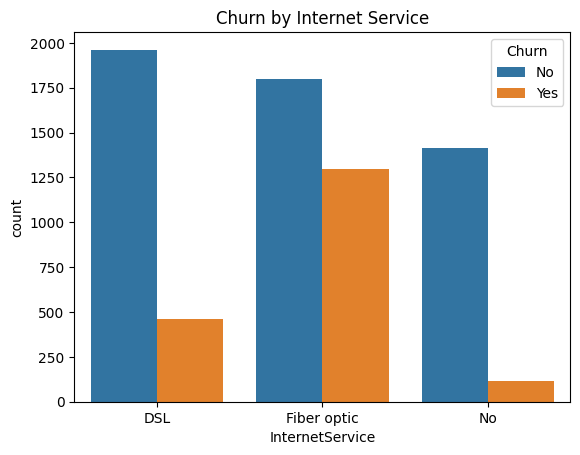

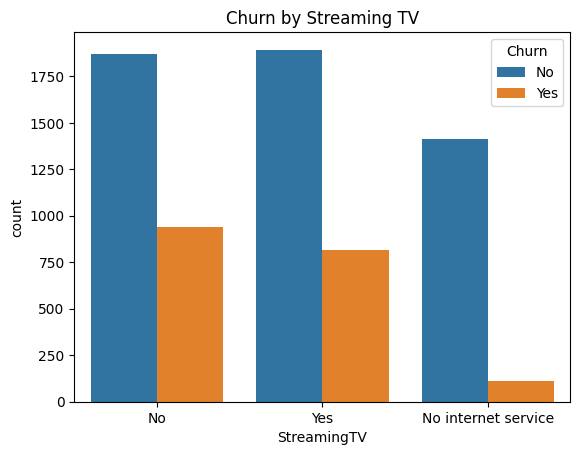

In [22]:
# Internet service usage and churn
sns.countplot(data=telecom_data_cleaned, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.show()

# Streaming service usage and churn
sns.countplot(data=telecom_data_cleaned, x='StreamingTV', hue='Churn')
plt.title('Churn by Streaming TV')
plt.show()


The analysis of churn based on internet service and streaming TV usage provides valuable insights. Customers using fiber optic internet services exhibit a notably higher churn rate compared to those using DSL or no internet service. This indicates potential dissatisfaction with fiber optic services, which could stem from issues like cost, reliability, or perceived value. On the other hand, customers without internet service show significantly lower churn rates, possibly because they rely on fewer services and have less incentive to leave.

In terms of streaming TV, customers who use this service tend to churn more frequently compared to those who do not. This suggests that customers using streaming TV might be more sensitive to the overall value of their telecom package or are more likely to switch to competitors offering better streaming options. These findings highlight the importance of improving the quality and affordability of fiber optic services and bundling streaming TV services effectively to enhance customer retention.

## 5. Financial Insights

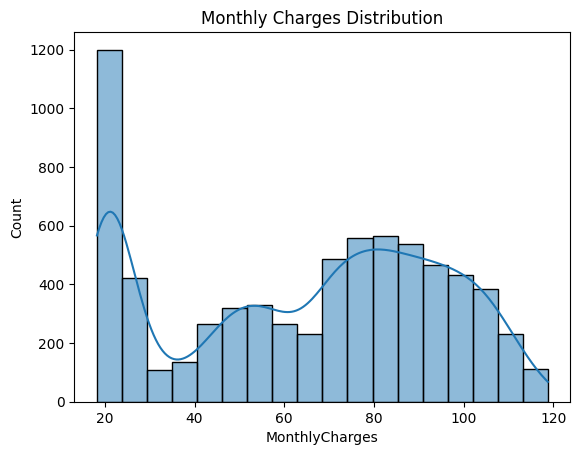

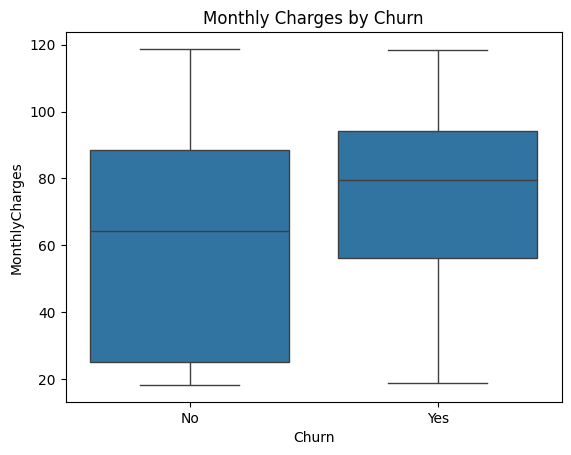

In [23]:
# Monthly charges distribution
sns.histplot(telecom_data_cleaned['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

# Monthly charges vs churn
sns.boxplot(data=telecom_data_cleaned, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

The distribution of monthly charges and their relationship with churn reveals valuable insights. The histogram shows a wide range of monthly charges, with a peak near the lower end, suggesting a large number of customers are paying less than $30 per month. However, there is significant variability in the distribution, indicating that the customer base spans a diverse range of payment levels.

The boxplot comparing monthly charges between customers who churned and those who stayed highlights a clear distinction. Customers who churned tend to have higher median monthly charges than those who did not churn. This suggests that high-paying customers might feel they are not receiving sufficient value for their payments or are more sensitive to pricing, making them more likely to switch providers.

## 6. Tenure Analysis

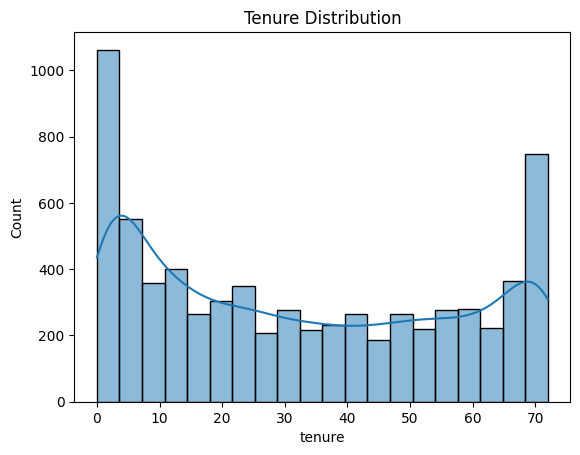

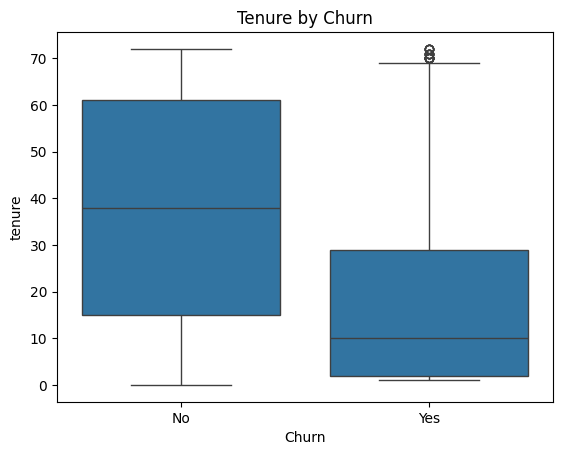

In [24]:
# Tenure distribution
sns.histplot(telecom_data_cleaned['tenure'], kde=True, bins=20)
plt.title('Tenure Distribution')
plt.show()

# Tenure vs churn
sns.boxplot(data=telecom_data_cleaned, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()


The tenure analysis highlights a significant relationship between customer tenure and churn behavior. The histogram indicates a bimodal distribution, with a large number of customers at very short tenure lengths (less than 10 months) and another peak near the maximum tenure (approximately 70 months). This suggests that the customer base includes a mix of new and long-term customers, with fewer mid-tenure customers.

The boxplot reveals a stark contrast between customers who churn and those who remain. Churned customers typically have much shorter tenure, with a median tenure of less than 15 months. In contrast, non-churned customers have a much higher median tenure of around 40 months. Additionally, non-churned customers display a wider range of tenure, indicating that long-term loyalty is a strong factor in retention.

## 7. Correlation Heatmap

In [25]:
# Check the first few rows
print(telecom_data_cleaned.head())

# Check column data types
print(telecom_data_cleaned.dtypes)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [31]:
# Select only numeric columns
numeric_columns = telecom_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Create a DataFrame with only numeric columns
telecom_numeric = telecom_data_cleaned[numeric_columns]

# Compute the correlation matrix
correlation_matrix = telecom_numeric.corr()


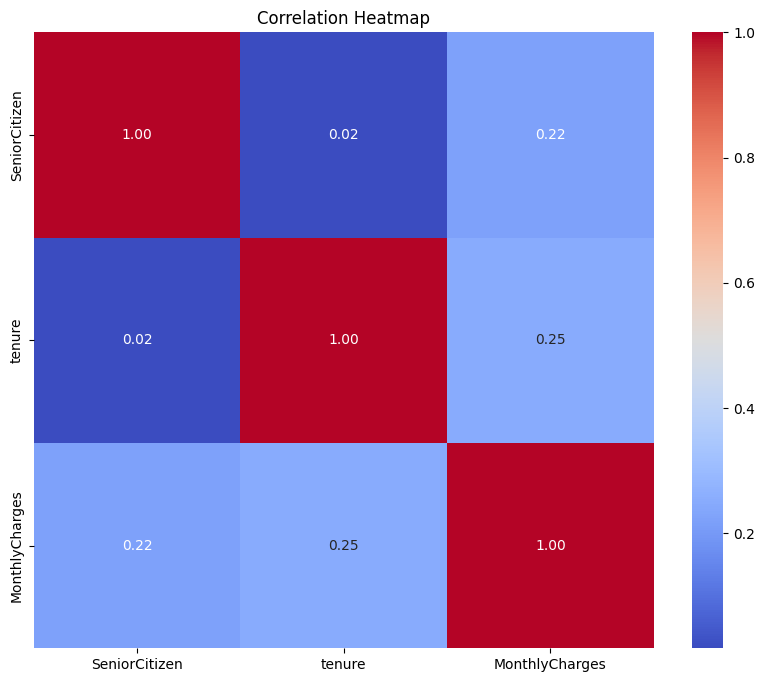

In [30]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals the relationships between key numerical variables: `SeniorCitizen`, `tenure`, and `MonthlyCharges`. A moderate positive correlation (0.25) is observed between tenure and monthly charges, indicating that customers with longer tenures may subscribe to higher-cost services or premium plans. Similarly, there is a weak positive correlation (0.22) between being a senior citizen and monthly charges, suggesting that senior citizens might slightly favor more expensive plans or additional services. However, the correlation between being a senior citizen and tenure is negligible (0.02), implying that age group does not strongly influence how long customers remain with the service. Overall, while these correlations are not strong, they highlight potential trends that can be further explored to understand customer behavior and its impact on churn.

# Conclusion

#### The analysis of the telecom churn data has revealed key insights into customer behavior and factors influencing churn. Customers who churn are typically those with shorter tenures, higher monthly charges, and those using specific services like fiber optic internet and streaming TV. Senior citizens also exhibit slightly higher churn rates, indicating they may face challenges or unmet needs. In contrast, customers with lower monthly charges and longer tenures are more likely to remain loyal.



# Recommendations

#### To reduce churn and improve customer retention, the telecom company should consider the following strategies: 

### 1. Improve retention of new customers by offering incentives like discounts or free trials of premium services during the initial months to build loyalty.

### 2. Since customers with higher monthly charges tend to churn more, review the pricing structure and perceived value of premium plans. Introduce flexible pricing, loyalty discounts, or bundled packages to make these services more attractive and cost-effective.

### 3. Address Senior Citizens' needs by offering more simplified plans or support to help with their specific needs.
